In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
# шаг метода
def step(y_l, y_c, y_r, x, t, h, tau):
    y = y_c + tau * (1 / 2 / h ** 2 * (y_l - 2 * y_c + y_r) + 4 * x ** 2 / (x ** 2 + t + 1) ** 3)
    return y

In [3]:
# функции гран условий
def bottom(x):
    return 1 / (x ** 2 + 1)

def left(t):
    return 1 / (t + 1)

def right(t):
    return 1 / (t + 2)

In [4]:
# константы
h = 1e-2
tau = h ** 2 / 3
t_max = 10
# print(int(t_max / tau))
solution = np.array(np.zeros([int(t_max / tau), int(1 / h) + 1]))

l = len(solution[0])

# задаем граничные суловия
for i in range(l):
    solution[0][i] = bottom(i * h)
for i in range(1, int(t_max / tau)):
    solution[i][0] = left(i * tau)
for i in range(1, int(t_max / tau)):
    solution[i][-1] = right(i * tau)

In [5]:
# сам метод
for j in tqdm(range(1, int(t_max / tau))):
    for i in range(1, l - 1):
        solution[j][i] = step(solution[j - 1][i - 1], solution[j - 1][i], solution[j - 1][i + 1], h * i, tau * j, h, tau)

100%|█████████████████████████████████| 299999/299999 [00:54<00:00, 5498.60it/s]


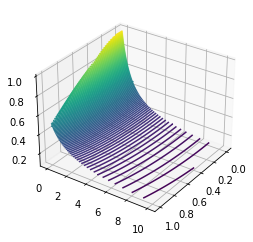

In [6]:
# график
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(np.array([i * h for i in range(int(1 / h) + 1)]), np.array([i * tau for i in range(int(t_max / tau))]), solution, 100, )
ax.view_init(30, 35)

